## Exercício 6: Completa as implementações dos modelos RidgeRegression e LogisticRegression

#### 6.1) Adiciona aos modelos anteriores o atributo (parâmetro estimado) cost_history. O cost_history deve ser um dicionário. Durante as iterações do Gradient Descent, computa a função de custo self.cost dataset )) e armazena o resultado no dicionário cost_history. A chave deve ser o número da iteração e o valor deve ser o custo nessa iteração.

#### 6.2) Realiza um gráfico (line plot ) que permita visualizar o comportamento do custo em função do número de iterações.

#### 6.3) Altera agora o algoritmo de Gradient Descent. Este algoritmo deve parar quando o valor da função de custo ( J/ self.cost ) não se altera.

#### 6.4) Adiciona uma segunda versão do algoritmo Gradient Descent. Este algoritmo deve diminuir o valor de alfa quando a função de custo ( J/ self.cost ) não se altera.

Implementação da classe RidgeRegression e LogisticRegression no sub-package linear_model.

In [25]:
# -*- coding: utf-8 -*-

# modules
import sys
sys.path.insert(0, 'C:/Users/ASUS/Desktop/Bioinfo/2ano/Sistemas Inteligentes/si/src/si')
from linear_model.ridge_regression import RidgeRegression
from linear_model.logistic_regression import LogisticRegression
from model_selection.split import train_test_split
import matplotlib.pyplot as plt

import os
os.chdir(r"C:/Users/ASUS/Desktop/Bioinfo/2ano/Sistemas Inteligentes/si/src/si/io")
from csv_file import read_csv


## RidgeRegression

## Regular fit

In [26]:

path = 'C:/Users/ASUS/Desktop/Bioinfo/2ano/Sistemas Inteligentes/si/datasets/cpu.csv'
cpu = read_csv(path, sep = ",", features = True, label = True)
print(cpu.shape())

(209, 6)


In [27]:
from sklearn.preprocessing import StandardScaler
cpu.X = StandardScaler().fit_transform(cpu.X)  # para normalizar dados
train, test = train_test_split(cpu, test_size=0.2, random_state=2)
    
cpu_ridge = RidgeRegression(use_adaptive_alpha = False, max_iter=2000)
cpu_ridge.fit(train)  
print(f"Predictions: {cpu_ridge.predict(test)}")
print(f"Score: {cpu_ridge.score(test)}")
print(f"Cost: {cpu_ridge.cost(test)}")


Predictions: [ 2.83877494e+02  1.71367820e+02  1.82146282e+02 -3.12284040e+01
  1.17117890e+02  5.31133007e+01 -7.04869810e+00 -1.65434553e+01
  1.97582559e+01 -2.47376080e+01  7.01747126e+01 -3.82352034e+01
  8.44183388e+01 -4.29222339e+01 -3.96317142e+01  4.69944409e-01
  7.20569484e+01  5.69059254e+01 -9.05330770e+00 -1.03937189e+01
  5.39943344e+02  1.00626723e+02 -1.21270164e+00 -2.26750611e+01
  8.35408150e+00 -2.00111842e+01  4.19423892e+02  5.27096673e+01
  2.83352065e+02 -1.16417466e+01 -1.24170414e+01  2.94118471e+02
  1.29623700e+02  2.72358457e+02 -2.65335649e+01  2.72358457e+02
 -4.26271816e+01 -5.57426867e+01 -4.20054336e+00  3.19153954e+01
 -3.55323640e+01]
Score: 1107.3485
Cost: 1204.1137


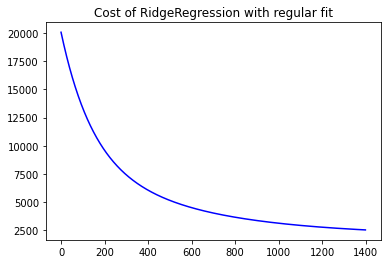

In [28]:
#print(cpu_ridge.cost_history)
plt.plot(list(cpu_ridge.cost_history.keys()), list(cpu_ridge.cost_history.values()), "-", color = "blue")
plt.title("Cost of RidgeRegression with regular fit")
plt.show()

## Adaptive fit

Predictions: [ 2.83922351e+02  1.71397493e+02  1.82171812e+02 -3.12037899e+01
  1.17148377e+02  5.31372731e+01 -7.03148705e+00 -1.65203161e+01
  1.97801124e+01 -2.47154721e+01  7.01993740e+01 -3.82184801e+01
  8.44418970e+01 -4.29056062e+01 -3.96116391e+01  4.86032163e-01
  7.20793768e+01  5.69367104e+01 -9.03485079e+00 -1.03713880e+01
  5.39993213e+02  1.00647545e+02 -1.19381683e+00 -2.26523855e+01
  8.37460773e+00 -1.99952980e+01  4.19477548e+02  5.27291513e+01
  2.83390833e+02 -1.16303444e+01 -1.23981575e+01  2.94163499e+02
  1.29652322e+02  2.72404157e+02 -2.65188384e+01  2.72404157e+02
 -4.26132673e+01 -5.57241669e+01 -4.18241719e+00  3.19368231e+01
 -3.55147772e+01]
Score: 1107.0108
Cost: 1203.7986


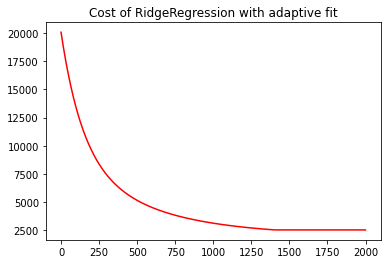

In [29]:
cpu_ridge_adapt = RidgeRegression(use_adaptive_alpha = True, max_iter=2000)
cpu_ridge_adapt.fit(train)  
print(f"Predictions: {cpu_ridge_adapt.predict(test)}")
print(f"Score: {cpu_ridge_adapt.score(test)}")
print(f"Cost: {cpu_ridge_adapt.cost(test)}")


plt.plot(list(cpu_ridge_adapt.cost_history.keys()), list(cpu_ridge_adapt.cost_history.values()), "-", color = "red")
plt.title("Cost of RidgeRegression with adaptive fit")
plt.show()

In [30]:
print('alpha:', cpu_ridge_adapt.alpha)

alpha: 1.204959932551442e-184


## LogisticRegression

In [31]:
path = 'C:/Users/ASUS/Desktop/Bioinfo/2ano/Sistemas Inteligentes/si/datasets/breast-bin.csv'
breast = read_csv(path, sep = ",", features = False, label = True)
    
from sklearn.preprocessing import StandardScaler
breast.X = StandardScaler().fit_transform(breast.X) 
train, test = train_test_split(breast, test_size=0.2, random_state=2)

## Regular fit

In [32]:
breast_log = LogisticRegression(use_adaptive_alpha = False, max_iter=2000)
breast_log.fit(train)  
print(f"Predictions: {breast_log.predict(test)}")
print(f"Score: {breast_log.score(test)}")
print(f"Cost: {round(breast_log.cost(test), 4)}")

Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Score: 0.9784
Cost: 0.2428


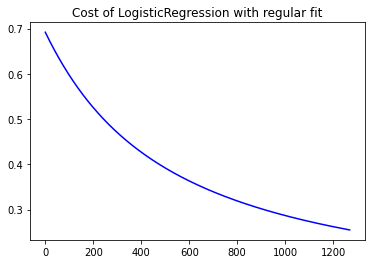

In [33]:
#print(breast_log.cost_history)
plt.plot(list(breast_log.cost_history.keys()), list(breast_log.cost_history.values()), "-", color = "blue")
plt.title("Cost of LogisticRegression with regular fit")
plt.show()  # com regular fit há early stopping

## Adaptive fit

In [34]:
breast_log_adapt = LogisticRegression(use_adaptive_alpha = True, max_iter=2000)
breast_log_adapt.fit(train)  
print('alpha: ', breast_log_adapt.alpha)
print(f"Predictions: {breast_log_adapt.predict(test)}")
print(f"Score: {breast_log_adapt.score(test)}")
print(f"Cost: {round(breast_log_adapt.cost(test), 4)}")

alpha:  8.852647460508905e-224
Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Score: 0.9784
Cost: 0.2427


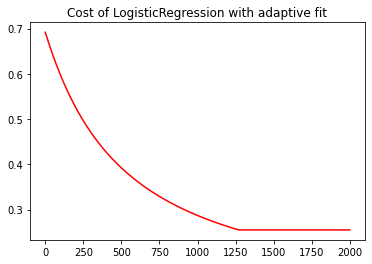

In [35]:
plt.plot(list(breast_log_adapt.cost_history.keys()), list(breast_log_adapt.cost_history.values()), "-", color = "red")
plt.title("Cost of LogisticRegression with adaptive fit") 
plt.show()

In [36]:
print('alpha: ', breast_log_adapt.alpha)  # não há early stopping, mas atualizo o alpha

alpha:  8.852647460508905e-224
